In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pandas as pd

### Importing Dataset

In [2]:
data_dir ='dataset'
ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  subset='training',
  validation_split=0.1,
  seed=123,
  image_size=(32,32))

Found 2509 files belonging to 35 classes.
Using 2259 files for training.


## LENET


In [3]:
class Lenet:
    
    model = keras.Sequential()

    model.add(keras.layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(32,32,3)))
    model.add(keras.layers.AveragePooling2D())

    model.add(keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
    model.add(keras.layers.AveragePooling2D())

    model.add(keras.layers.Flatten())

    model.add(keras.layers.Dense(units=120, activation='relu'))

    model.add(keras.layers.Dense(units=84, activation='relu'))

    model.add(keras.layers.Dense(units=35, activation = 'softmax'))

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])    
    
    def __init__(self):
        pass
    
    def train(self,data,epoch):
        self.model.fit(data,epochs=epoch)
        
    def predict_class(self,test_img):
        return str(self.model.predict_classes(test_img)[0])        
                
    def save_model(self):
        self.model.save('Lenet.h5')

In [4]:
model = Lenet()
model.train(ds,15)

Epoch 1/15
71/71 [==============================] - 1s 16ms/step - loss: 3.4500 - accuracy: 0.4697
Epoch 2/15
71/71 [==============================] - 1s 17ms/step - loss: 0.9423 - accuracy: 0.7826
Epoch 3/15
71/71 [==============================] - 1s 15ms/step - loss: 0.5383 - accuracy: 0.8783
Epoch 4/15
71/71 [==============================] - 1s 16ms/step - loss: 0.3481 - accuracy: 0.9150
Epoch 5/15
71/71 [==============================] - 1s 16ms/step - loss: 0.2382 - accuracy: 0.9433
Epoch 6/15
71/71 [==============================] - 1s 15ms/step - loss: 0.1797 - accuracy: 0.9557
Epoch 7/15
71/71 [==============================] - 1s 15ms/step - loss: 0.1308 - accuracy: 0.9664
Epoch 8/15
71/71 [==============================] - 1s 15ms/step - loss: 0.1073 - accuracy: 0.9761
Epoch 9/15
71/71 [==============================] - 1s 15ms/step - loss: 0.0679 - accuracy: 0.9801
Epoch 10/15
71/71 [==============================] - 1s 15ms/step - loss: 0.0613 - accuracy: 0.9832
Epoch 11/

## Model Summary

In [5]:
print(model.model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 6)         168       
_________________________________________________________________
average_pooling2d (AveragePo (None, 15, 15, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 16)        880       
_________________________________________________________________
average_pooling2d_1 (Average (None, 6, 6, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               69240     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
 21 17 2 0 14 3 3 4 3


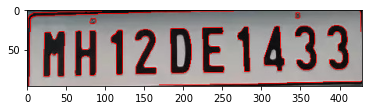

In [6]:

image = cv2.imread('test.jpg')

gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
edged = cv2.Canny(blurred, 50, 200, 255)

cv2.threshold(edged,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU,gray)

contours,_ = cv2.findContours(edged, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)

code = ''

if(len(contours) !=0):
    for c in contours:

        x, y, w, h = cv2.boundingRect(c)     
        area = cv2.contourArea(c)
        
        if(area>100):        
            img = image[y:y+h,x:x+w]
            img = cv2.resize(img,(32,32))
            img = np.reshape(img,(1,32,32,3))
            code  = code + ' ' + model.predict_class(img)

    cv2.drawContours(image, contours, -1, (255 ,0,0), 1)
    plt.imshow(image)
        
print(code)

## Saving the Model

In [8]:
model.save_model()